**Table of contents**<a id='toc0_'></a>    
- 1. [Ploting Energy Levels of NV](#toc1_)    
- 2. [Custom Sequence](#toc2_)    
- 3. [Rabi](#toc3_)    
- 4. [Ramsey](#toc4_)    
- 5. [Hahn](#toc5_)    
- 6. [PODMR](#toc6_)    
- 7. [CPMG](#toc7_)    
- 8. [XY](#toc8_)    
- 9. [XY8](#toc9_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
from qutip import tensor, jmat, qeye, mesolve, fock_dm, parallel_map
import numpy as np
import matplotlib.pyplot as plt

from quaccatoo.QSys import QSys, plot_energy_B0, NV
from quaccatoo.PulsedExp import PulsedExp
from quaccatoo.BasicPulsedExp import Rabi, PODMR, Ramsey, Hahn
from quaccatoo.DDPulsedExp import CPMG, XY, XY8
from quaccatoo.Analysis import Analysis, fit_rabi

# 1. <a id='toc1_'></a>[Ploting Energy Levels of NV](#toc0_)

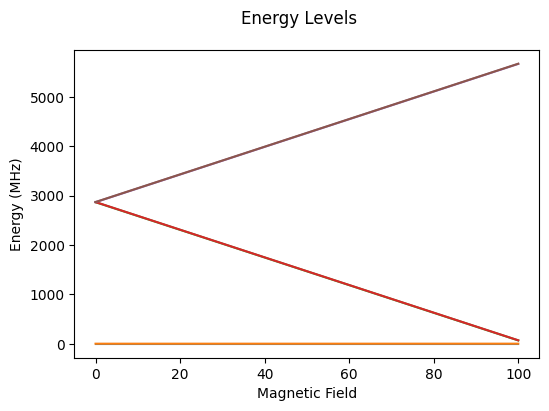

In [2]:
B0 = np.linspace(0, 100, 100)
plot_energy_B0(B0, [NV(N=15, B0 = b).H0 for b in B0])

# 2. <a id='toc2_'></a>[Custom Sequence](#toc0_)

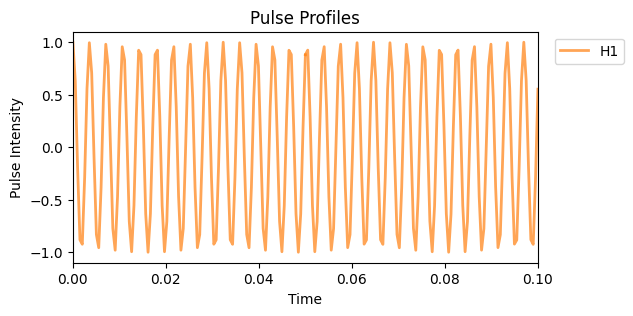

In [3]:
system = NV(N=15, B0=40, theta=1, units_angles='deg')
H1 = 10*system.MW_H1()
pulse_params = {'omega_pulse': system.MW_freqs()[0]}
t_pi = .1/2

my_seq = PulsedExp(system)
my_seq.add_pulse(duration=t_pi, H1=H1, pulse_params=pulse_params)
my_seq.add_pulse(t_pi, H1, pulse_params=pulse_params)
my_seq.measure(system.observable)
my_seq.plot_pulses(figsize=(6, 3))

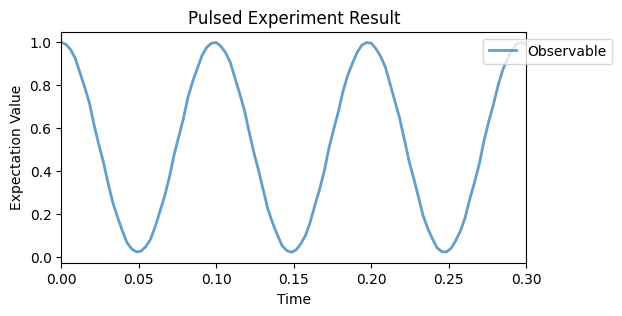

In [4]:
def sequence(tpulse):
    seq = PulsedExp(system)
    seq.add_pulse(tpulse, H1, pulse_params=pulse_params)
    return seq.measure()

tarray = np.linspace(0, 6*t_pi, 100)
my_seq.run(tarray, sequence)
my_seq.plot_results(figsize=(6, 3))

# 3. <a id='toc3_'></a>[Rabi](#toc0_)

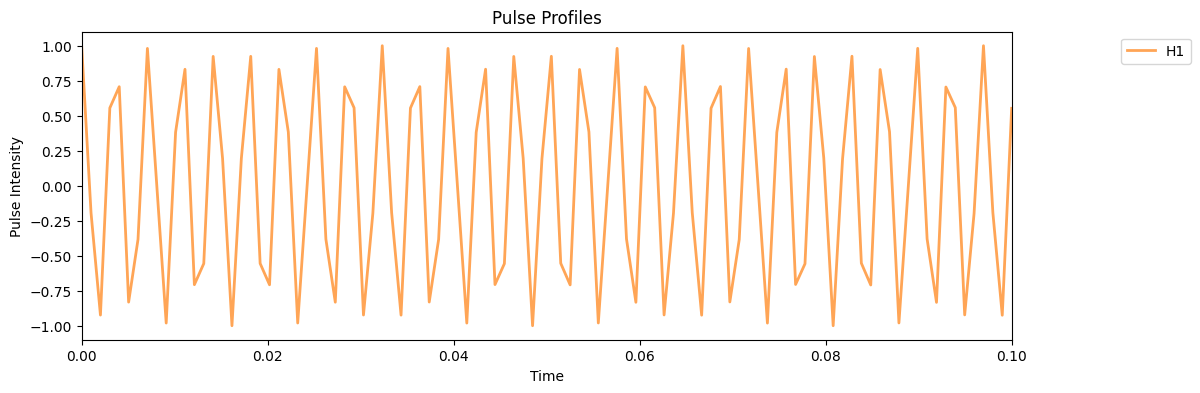

In [9]:
system = NV(N=15, B0=40, theta=1, units_angles='deg')
w1 = 30
H1 = w1*system.MW_H1()
pulse_params = {'omega_pulse': system.MW_freqs()[0]}

experiment = Rabi(
    pulse_duration = np.linspace(0, 6*t_pi, 100),
    system=system,
    H1=H1,
    pulse_params=pulse_params
)

experiment.plot_pulses(figsize=(12, 4))

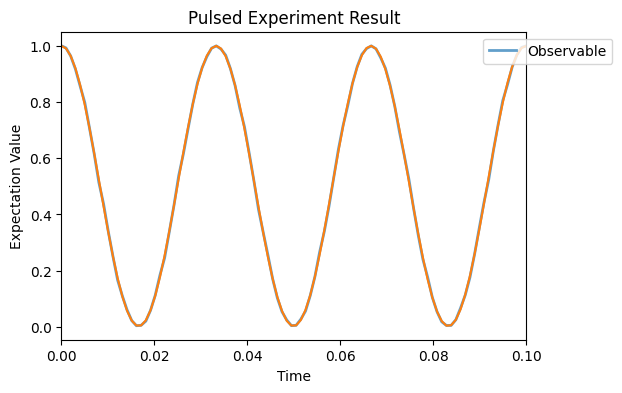

In [10]:
experiment.run()
analysis = Analysis(experiment)
analysis.run_fit(fit_function=fit_rabi, guess=[0.5, 1/w1/2, 0.5, 0])
analysis.plot_fit()

In [8]:
analysis.fit

array([ 4.98450726e-01,  1.66493957e-02,  5.01110065e-01, -1.59432314e-04])

# 4. <a id='toc4_'></a>[Ramsey](#toc0_)

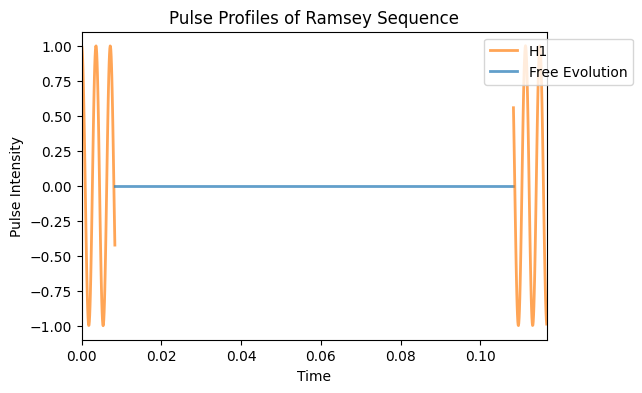

In [8]:
w1 = 30
system = NV(N=15, B0=40)
H1 = w1*system.MW_H1()
t_pi = 1/w1/2

experiment = Ramsey(
    system = system,
    free_duration = np.linspace(0, 5, 100),
    pi_pulse_duration = t_pi,
    H1 = H1,
    options = {'nsteps': 1e6},
    pulse_params = {'omega_pulse': system.MW_freqs()[0]}
)

experiment.plot_pulses(tau=.1,figsize=(6, 4))

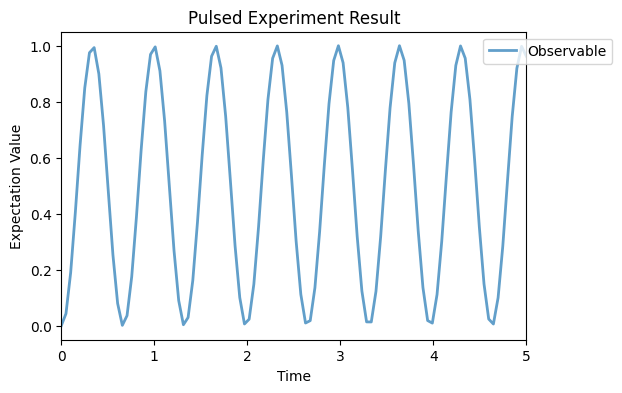

In [3]:
experiment.run()
experiment.plot_results(figsize=(6, 4))

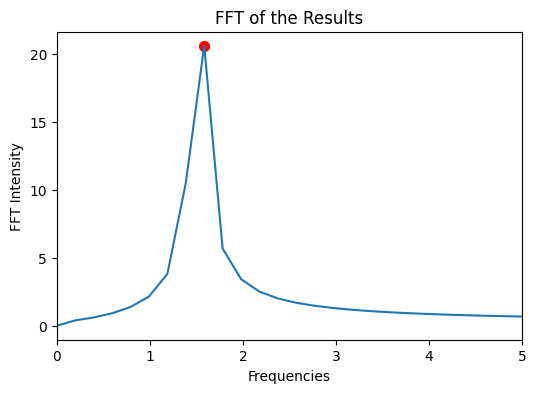

In [5]:
analisys = Analysis(experiment)
analisys.run_FFT()
analisys.get_peaks_FFT(height=1.50)
analisys.plot_FFT(freq_lim=[0,5])

# 5. <a id='toc5_'></a>[Hahn](#toc0_)

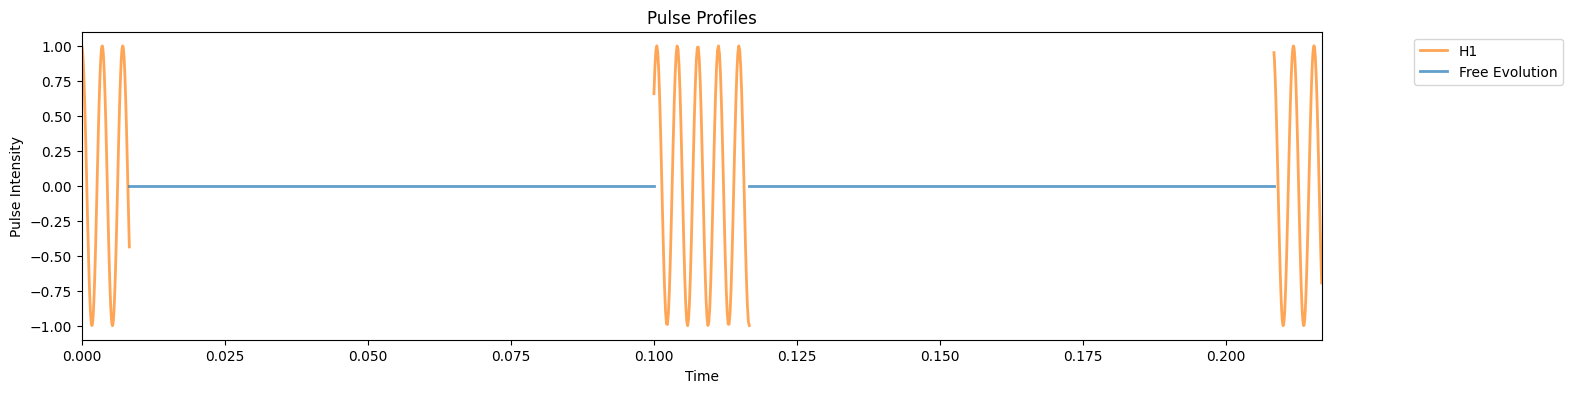

In [7]:
w1 = 30
system = NV(N=15, B0=40, theta=2, units_angles='deg')
H1 = w1*system.MW_H1()
t_pi = 1/w1/2

experiment = Hahn(
    system = system,
    free_duration = np.linspace(0, 10, 100),
    pi_pulse_duration = t_pi,
    H1 = H1,
    options = {'nsteps': 1e6},
    pulse_params = {'omega_pulse': system.MW_freqs()[0]}
)

experiment.plot_pulses(tau=.1, figsize=(16, 4))


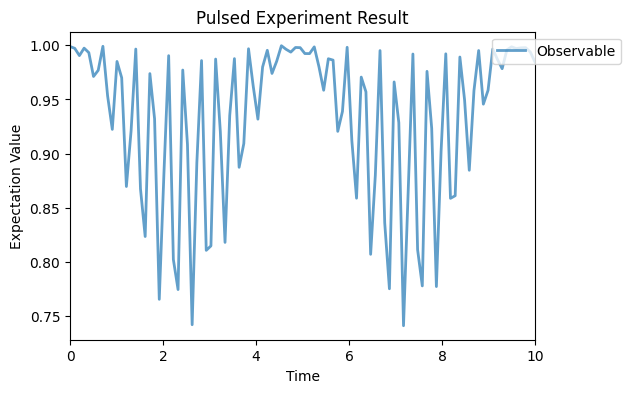

In [3]:
experiment.run()
experiment.plot_results(figsize=(6, 4))

# 6. <a id='toc6_'></a>[PODMR](#toc0_)

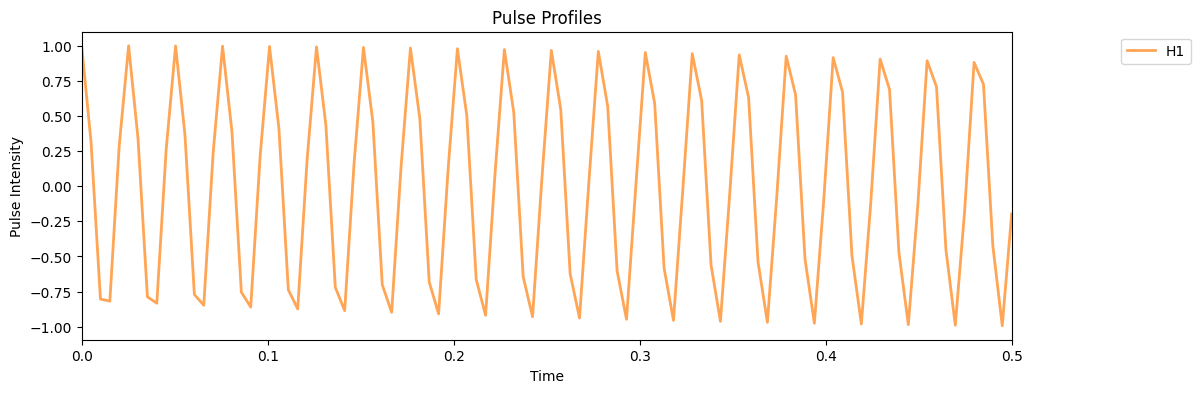

In [5]:
w1 = .1
system = NV(N=15, B0=40, units_angles='deg')
H1 = w1*system.MW_H1()
t_pi = .1/w1/2

experiment = PODMR(
    system = system,
    frequencies =  np.linspace(3980, 4000, 100),
    pulse_duration = t_pi,
    H1 = H1,
    options = {'nsteps': 1e6},
)

experiment.plot_pulses(figsize=(12, 4))

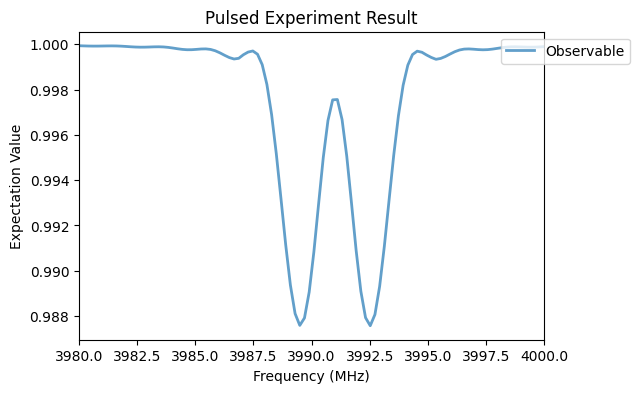

In [6]:
experiment.run()
experiment.plot_results(figsize=(6, 4), xlabel='Frequency (MHz)')

# 7. <a id='toc7_'></a>[CPMG](#toc0_)

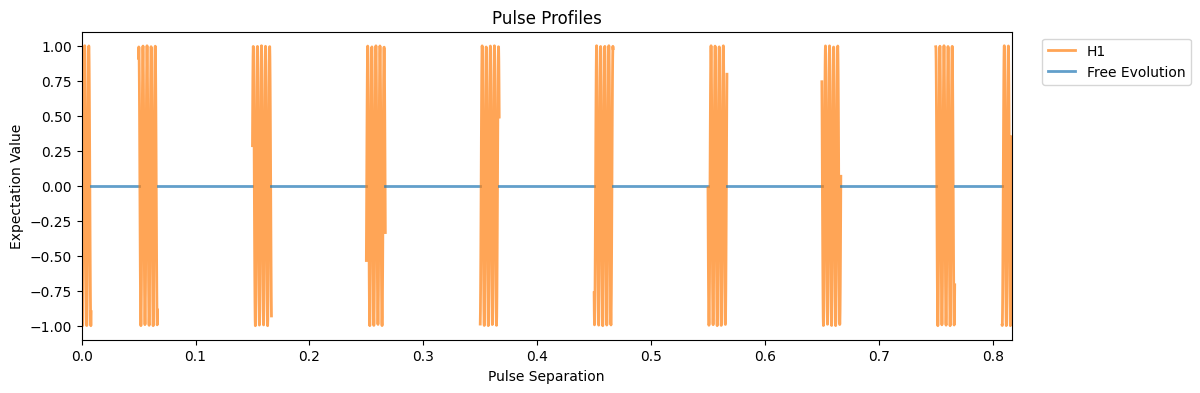

In [2]:
w1 = 30
system = NV(N=15, B0=40, theta=2, units_angles='deg')
H1 = w1*system.MW_H1()
t_pi = 1/w1/2

experiment = CPMG(
    M = 8,
    system = system,
    free_duration = np.linspace(.1, .8, 40),
    pi_pulse_duration = t_pi,
    H1 = H1,
    options = {'nsteps': 1e6},
    pulse_params = {'omega_pulse': system.MW_freqs()[0]}
)
experiment.plot_pulses(tau = .1, figsize=(12, 4))

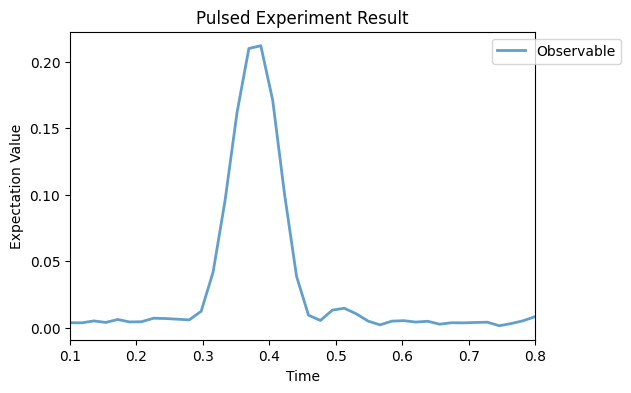

In [4]:
experiment.run()
experiment.plot_results(figsize=(6, 4))

# 8. <a id='toc8_'></a>[XY](#toc0_)

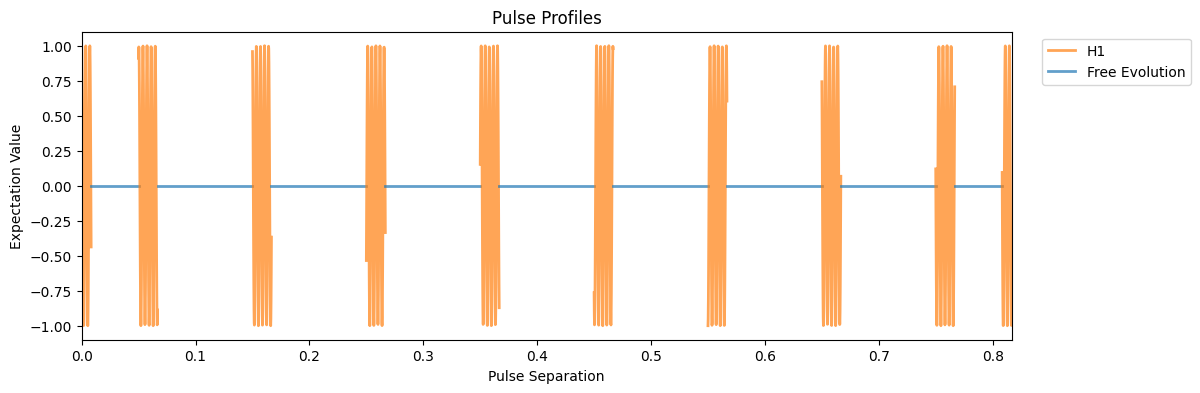

In [3]:
w1 = 30
system = NV(N=15, B0=40, theta=2, units_angles='deg')
H1 = w1*system.MW_H1()
t_pi = 1/w1/2

experiment = XY(
    M = 4,
    system = system,
    free_duration = np.linspace(0, 1, 100),
    pi_pulse_duration = t_pi,
    H1 = H1,
    options = {'nsteps': 1e6},
    pulse_params = {'omega_pulse': system.MW_freqs()[0]}
)

experiment.plot_pulses(tau=.1, figsize=(12, 4))

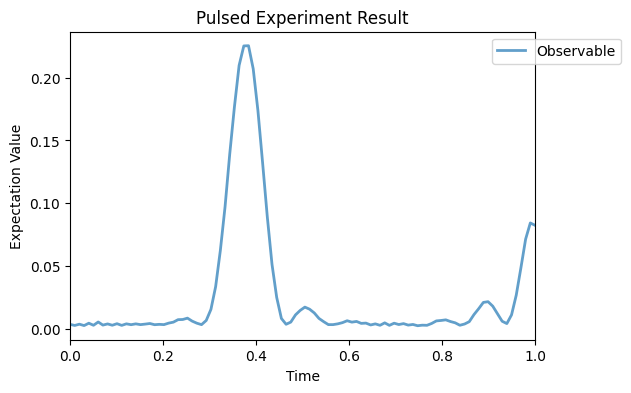

In [3]:
experiment.run()
experiment.plot_results(figsize=(6, 4))

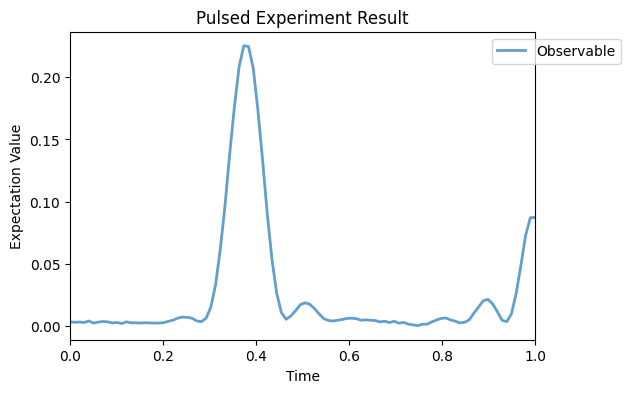

In [5]:
experiment.run()
experiment.plot_results(figsize=(6, 4))

# 9. <a id='toc9_'></a>[XY8](#toc0_)

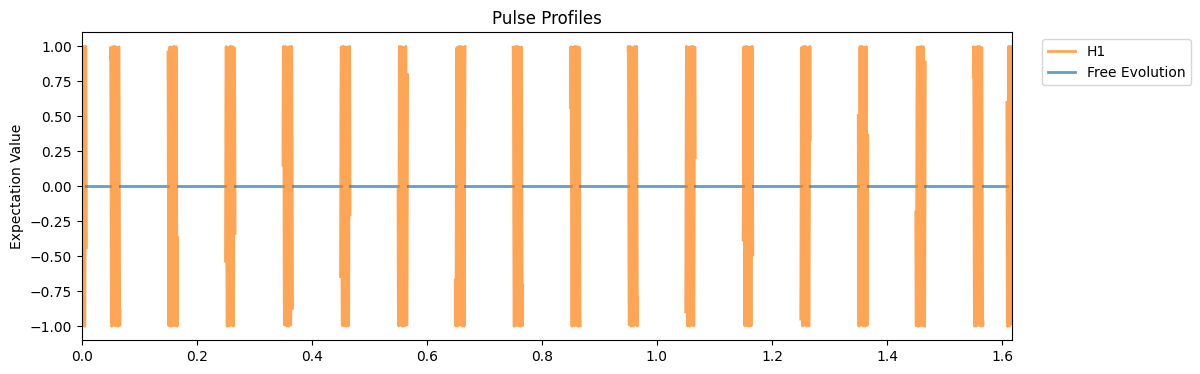

In [2]:
w1 = 30
system = NV(N=15, B0=40, theta=2, units_angles='deg')
H1 = w1*system.MW_H1()
t_pi = 1/w1/2

experiment = XY8(
    M = 2,
    system = system,
    free_duration = np.linspace(.2, .6, 40),
    pi_pulse_duration = t_pi,
    H1 = H1,
    options = {'nsteps': 1e6},
    pulse_params = {'omega_pulse': system.MW_freqs()[0]}
)

experiment.plot_pulses(tau=.1, figsize=(12, 4))

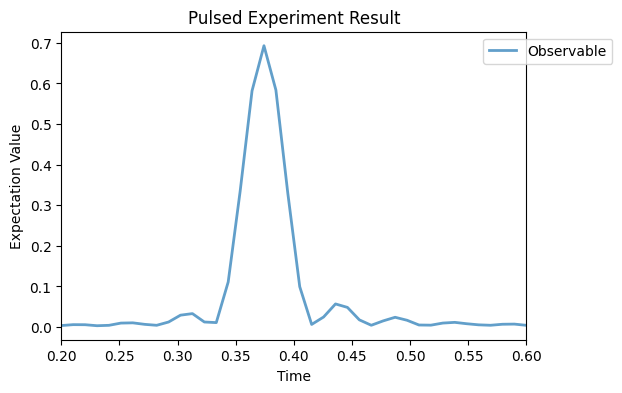

In [3]:
experiment.run()
experiment.plot_results(figsize=(6, 4))